# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


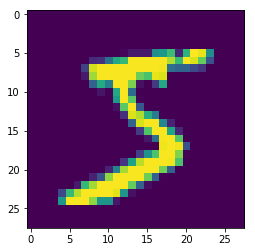

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
datagen.fit(X_train)
iterator = datagen.flow(X_train, y_train, batch_size=len(X_train), shuffle=False)
X_train, y_train = iterator.next()
print(X_train.shape, X_train.mean(), X_train.std())

datagen.fit(X_test)
iterator = datagen.flow(X_test, y_test, batch_size=len(X_train), shuffle=False)
X_test, y_test = iterator.next()
print(X_test.shape, X_test.mean(), X_test.std())

# This part of code performs Image Normalization with mean and standard deviation.
# ImageDataGenerator - It generates batches of image data with real-time data augmentation.This data will be looped over in batches.
# Here we give the batch size as the whole data size so that we have loop only once to get the entire data.
# We also give featurewise_center as True, which sets input mean to 0 feature-wise , over the dataset and 
# featurewise_std_normalization also as True, which divides the inputs by std of the dataset, feature-wise.

(60000, 28, 28, 1) -4.9324944e-07 0.9999959
(10000, 28, 28, 1) -2.0761392e-07 0.9999966


In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization
from keras import regularizers
model = Sequential()

 
model.add(Convolution2D(10, 3, 3, kernel_regularizer=regularizers.l2(0.0001), input_shape=(28,28,1))) # 28 , 3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, kernel_regularizer=regularizers.l2(0.0001))) # 26 , 5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, kernel_regularizer=regularizers.l2(0.0001))) # 27 , 5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) # 24

model.add(Convolution2D(16, 3, 3, kernel_regularizer=regularizers.l2(0.0001))) # 12 , 10
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, kernel_regularizer=regularizers.l2(0.0001))) # 10 , 12
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, kernel_regularizer=regularizers.l2(0.0001))) # 8 , 14
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, kernel_regularizer=regularizers.l2(0.0001))) # 6 , 16
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 4, 4)) # 4 , 18

model.add(Flatten())
model.add(Activation('softmax'))

# Regularizers allow to apply penalties on layer parameters or layer activity during optimization. 
# These penalties are incorporated in the loss function that the network optimizes.
# L1 and L2 are the most common types of regularization. 
# These update the general cost function by adding another term known as the regularization term. 
# L2 regularization is also known as weight decay as it forces the weights to decay towards zero (but not exactly zero).
# Here the regularization parameter that is passed is .0001

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), kernel_regularizer=<keras.reg..., input_shape=(28, 28, 1...)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipy

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_22 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
activation_11 (Activation)   (None, 26, 26, 10)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_23 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
activation_12 (Activation)   (None, 24, 24, 16)        0         
__________

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint

def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

checkpoint = ModelCheckpoint('model-{epoch:03d}-{acc:03f}-{val_acc:03f}.h5', verbose=1, monitor='val_acc',save_best_only=True, mode='auto')

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

# ModelCheckpoint saves the model after every epoch.
# Here in this model , we save the the model of the first epoch. 
# Then after each epoch it monitors the validation accuracy and see if it greater than the one in the saved model,
# if it is greater than the previous one , it will save this model, otherwise it will skip the saving part.
# This checkpoint is passed to model.fit()

In [0]:
model.fit(X_train, Y_train, batch_size=128, epochs=40, verbose=1, validation_data=(X_test, Y_test), 
          callbacks=[LearningRateScheduler(scheduler, verbose=1), checkpoint])


Train on 60000 samples, validate on 10000 samples
Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 13s 215us/step - loss: 0.2579 - acc: 0.9215 - val_loss: 0.1734 - val_acc: 0.9514

Epoch 00001: val_acc improved from -inf to 0.95140, saving model to model-001-0.921533-0.951400.h5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 8s 128us/step - loss: 0.0759 - acc: 0.9800 - val_loss: 0.0681 - val_acc: 0.9818

Epoch 00002: val_acc improved from 0.95140 to 0.98180, saving model to model-002-0.980000-0.981800.h5
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 8s 128us/step - loss: 0.0629 - acc: 0.9838 - val_loss: 0.0482 - val_acc: 0.9891

Epoch 00003: val_acc improved from 0.98180 to 0.98910, saving model to model-003-0.983833-0.989100.h5
Epoch 4/40


In [0]:
model.load_weights("model-021-0.993283-0.994700.h5")

# The network loads the weights of the saved model.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.028171895031630992, 0.9947]


In [0]:
y_pred = model.predict(X_test)
y_pred_class = y_pred.argmax(axis=-1)

print(y_pred_class[:20])
print(y_test[:20])

incorrects = np.nonzero(y_pred_class != y_test)
print(incorrects[0][:25])

# We use the argmax function to display the predicted classes for each test image.
# Then we compare this with the fround truth to find the indices of the wrongly classified images in the Test dataset.

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[ 321  449  659  740  947 1014 1039 1226 1232 1247 1260 1299 1530 1621
 1709 1737 1901 2035 2130 2135 2293 2462 2488 2597 2654]


In [0]:
X_test = X_test.reshape(X_test.shape[0], 28, 28)
print(X_test.shape)

# We reshape the X_test into the original mnist dataset shape to display the wrongly classified images.

(10000, 28, 28)


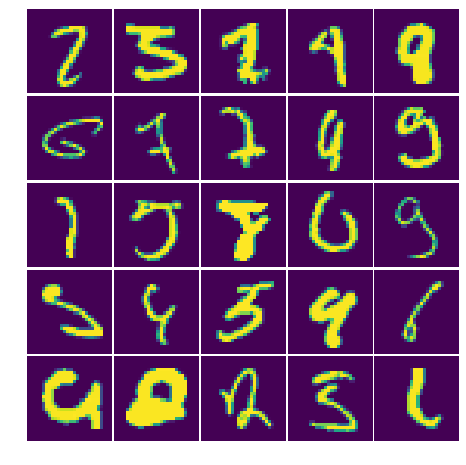

In [0]:
plt.figure(figsize=(6, 6))

for i in range(25):
  ax = plt.subplot(5, 5, i+1)
  plt.imshow(X_test[incorrects[0][i]])
  plt.axis('off')

plt.subplots_adjust(wspace=.03, hspace=.03, left=0, right=1, bottom=0, top=1)
plt.show()

# We use the plot() function of matplotlib to display the first 25 wrongly classified images from the Test dataset.

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers]) 

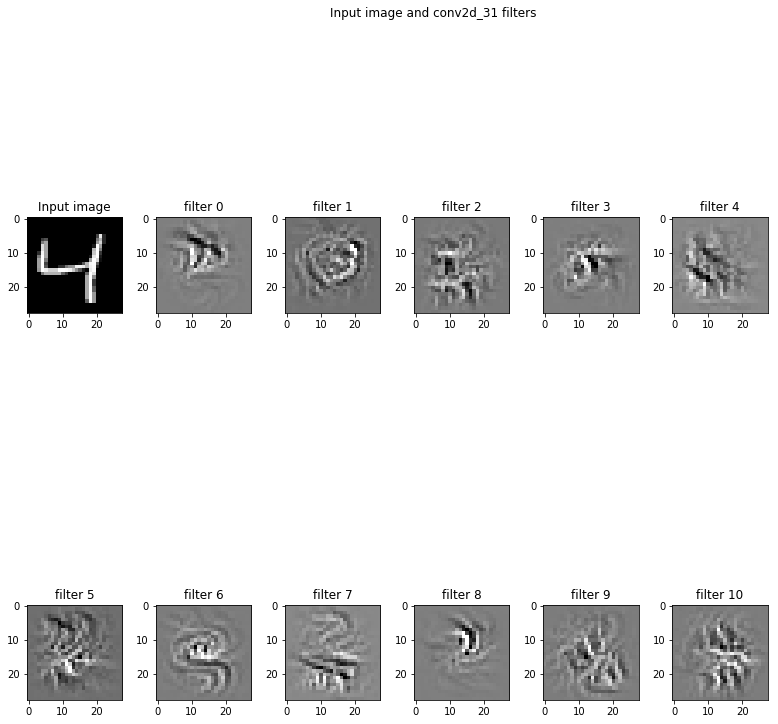

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_31'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

Observations

In this network , i first added Image normalization and ran the network for 20 epochs and i got an validation accuracy of 99.23. Then i added l2 regularization in each convolution layer, and the validation accuracy increased to 99.34 for 20 epochs itself. Then after changing the order of Batch Normalization and ReLU activations in each layer , the validation accuracy remained the same for 20 epochs. Now i increased the epochs tp 40 , and also added a model checkpoint to save the best model with highest validation accuracy. Now running this network , i got a validation accuracy of 99.47 at the 21st epoch.
